In [1]:
# Q1 Data Exploration:  Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

import pandas as pd

df = pd.read_csv("C:\\Users\\arunj\\Downloads\\Employee.csv")  


In [5]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [11]:
df_unique = pd.DataFrame({col: [df[col].unique(), len(df[col].unique())] for col in df.columns}).T
df_unique.columns = ['Unique Values', 'Count of Unique Values']

In [7]:
# statistical analysis
df_statistics = df.describe()

In [8]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


In [9]:
df.head()

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [13]:
df_unique 
 


,Unique Values,Count of Unique Values
company,"[TCS, Infosys, CTS, nan, Tata Consultancy Serv...",7
age,"[20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0...",30
salary,"[nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, ...",41
place,"[Chennai, Mumbai, Calcutta, Delhi, Podicherry,...",12
country,[India],1
gender,"[0, 1]",2


In [14]:
df_statistics

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [16]:
# Replace 0 in 'age' column with NaN
df['age'].replace(0, pd.NA, inplace=True)

C:\Users\arunj\AppData\Local\Temp\ipykernel_5864\88434990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, pd.NA, inplace=True)


In [18]:
df['age'].replace(0, pd.NA, inplace=True)


In [20]:
#Check for missing values
missing_values = df.isnull().sum()

In [21]:
#Remove duplicate rows
df.drop_duplicates(inplace=True)

In [27]:
#4. Identify and handle outliers using IQR method (for 'age' and 'salary')

# 1. Replace 0 in 'age' column with NaN
df['age'] = df['age'].replace(0, pd.NA)

# Convert 'age' column to numeric if it's not already
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 2. Check for missing values
missing_values = df.isnull().sum()

# 3. Remove duplicate rows
df.drop_duplicates(inplace=True)

# 4. Identify and handle outliers using IQR method (for 'age' and 'salary')
# For Age column
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_outliers = (df['age'] < (Q1_age - 1.5 * IQR_age)) | (df['age'] > (Q3_age + 1.5 * IQR_age))

# For Salary column
Q1_salary = df['salary'].quantile(0.25)
Q3_salary = df['salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
salary_outliers = (df['salary'] < (Q1_salary - 1.5 * IQR_salary)) | (df['salary'] > (Q3_salary + 1.5 * IQR_salary))

# Remove outliers
df = df[~age_outliers & ~salary_outliers]

# 5. Treating missing values:
# For numerical columns (use median if data is skewed, mean if data is not skewed):
df['age'] = df['age'].fillna(df['age'].median())
df['salary'] = df['salary'].fillna(df['salary'].mean())

# For categorical columns (use mode):
df['company'] = df['company'].fillna(df['company'].mode()[0])
df['place'] = df['place'].fillna(df['place'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# 6. Check for missing values after treatment
missing_values_after = df.isnull().sum()


In [28]:
df.head()

,company,age,salary,place,country,gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


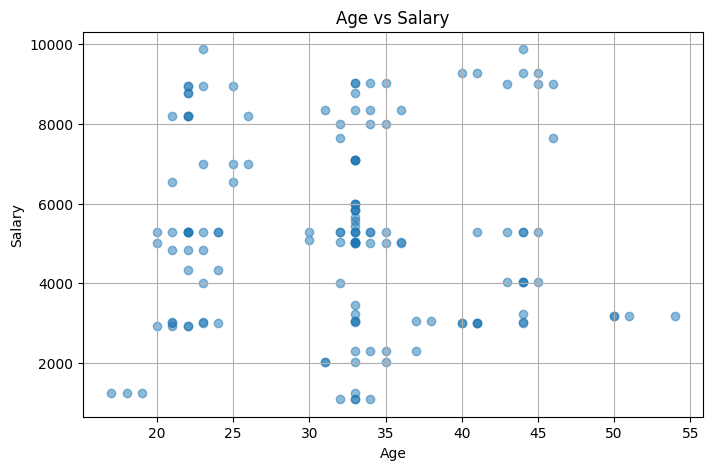

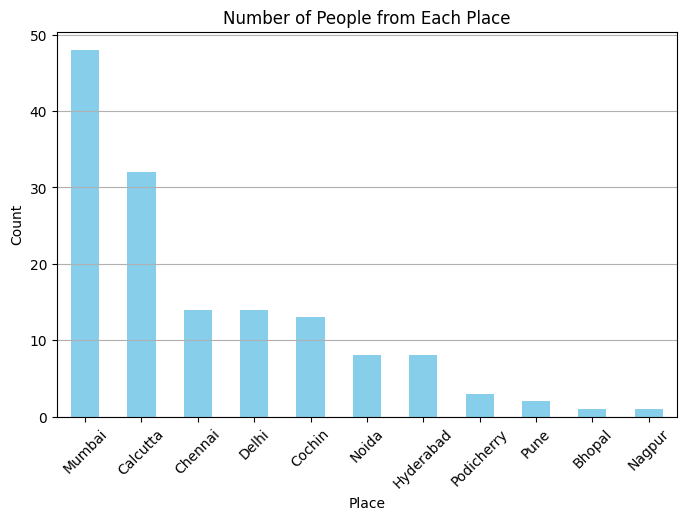

In [30]:
# Q3 Data Analysis:Filter the data with age >40 and salary<5000,  Plot the chart with age and salary Count the number of people from each place and represent it visually

import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter the data with age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]

# 2. Plot the relationship between Age and Salary
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['salary'], alpha=0.5)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# 3. Count the number of people from each place and visualize it
place_counts = df['place'].value_counts()

# Plot the number of people from each place
plt.figure(figsize=(8, 5))
place_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()



In [31]:
#Q4 Data Encoding
df_encoded = pd.get_dummies(df, columns=['company', 'place'], drop_first=True)

In [32]:
df_encoded.head()

,age,salary,country,gender,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,20.0,5283.471074,India,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.471074,India,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.000000,India,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,India,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.000000,India,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Q5 Feature Scaling

# Initialize StandardScaler and MinMaxScale
from sklearn.preprocessing import StandardScaler, MinMaxScaler


standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()